# Importing necessary libraries

In [2]:
# handling the 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
# import systemcheck

### Loading the data

In [3]:
data = pd.read_csv('AAPL.csv')
data

,Unnamed: 0,date,open,high,low,close,volume,sma,macd,stochastic_k,stochastic_d,rsi,william_r,trend,trading_signal,trading_decision,p_t_s_lstm
0,0,1981-02-12,0.468750,0.468750,0.466518,0.020996,3640000.0,0.023220,-0.001240,23.560462,28.421163,35.605206,480.364147,down,0.178521,NaN,NaN
1,1,1981-02-13,0.459821,0.459821,0.455357,0.020494,2788800.0,0.022831,-0.001336,20.837501,26.124424,33.582974,499.638016,down,0.208420,NaN,NaN
2,2,1981-02-17,0.466518,0.468750,0.466518,0.020996,3068800.0,0.022503,-0.001315,18.552410,23.536980,37.411210,460.357901,down,0.312526,NaN,NaN
3,3,1981-02-18,0.486607,0.491071,0.486607,0.021900,4810400.0,0.022248,-0.001167,17.340235,20.983458,43.704039,531.528070,down,0.500000,NaN,NaN
4,4,1981-02-19,0.459821,0.459821,0.457589,0.020594,5577600.0,0.021960,-0.001134,16.343269,18.910049,37.792337,641.039362,down,0.500000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,9565,2019-01-22,156.410004,156.729996,152.619995,153.300003,30394000.0,152.545334,-0.422658,44.273134,37.281126,43.296899,34.907821,down,0.059289,NaN,5.000178e-01
9566,9566,2019-01-23,154.149994,155.139999,151.699997,153.919998,23130600.0,152.290667,-0.032701,47.619112,40.769244,44.191328,29.258197,up,0.620554,sell,5.146423e-04
9567,9567,2019-01-24,154.110001,154.479996,151.740005,152.699997,25441500.0,151.942667,0.145721,50.839916,44.246418,42.761930,32.619687,down,0.500000,buy,5.000178e-01
9568,9568,2019-01-25,155.479996,158.130005,154.320007,157.759995,33535500.0,152.980666,0.695944,54.316906,47.577387,49.987463,0.852344,up,0.630952,sell,4.841428e-11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9570 entries, 0 to 9569
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9570 non-null   int64  
 1   date              9570 non-null   object 
 2   open              9570 non-null   float64
 3   high              9570 non-null   float64
 4   low               9570 non-null   float64
 5   close             9570 non-null   float64
 6   volume            9570 non-null   float64
 7   sma               9570 non-null   float64
 8   macd              9570 non-null   float64
 9   stochastic_k      9570 non-null   float64
 10  stochastic_d      9570 non-null   float64
 11  rsi               9570 non-null   float64
 12  william_r         9570 non-null   float64
 13  trend             9570 non-null   object 
 14  trading_signal    9570 non-null   float64
 15  trading_decision  1395 non-null   object 
 16  p_t_s_lstm        2385 non-null   float64


In [5]:
data.describe()

,Unnamed: 0,open,high,low,close,volume,sma,macd,stochastic_k,stochastic_d,rsi,william_r,trading_signal,p_t_s_lstm
count,9570.000000,9570.000000,9570.000000,9570.000000,9570.000000,9.570000e+03,9570.000000,9570.000000,9570.000000,9570.000000,9570.000000,9570.000000,9570.000000,2385.000000
mean,4784.500000,26.646913,26.903162,26.372831,23.028854,8.782335e+07,22.915762,0.076859,56.495263,56.489468,53.582154,415.226367,0.422466,0.378066
std,2762.765372,47.224309,47.629419,46.802462,45.239823,8.674968e+07,45.085657,0.919049,26.432106,26.331775,13.065209,284.134457,0.319909,0.294025
min,0.000000,0.198661,0.198661,0.196429,0.008840,3.472000e+05,0.009879,-11.133678,2.176819,2.244943,15.769554,-60.052293,0.000000,0.000000
25%,2392.250000,1.060268,1.080357,1.037322,0.153768,3.429580e+07,0.152856,-0.007399,34.216596,34.250170,44.171319,211.600009,0.097475,0.040118
50%,4784.500000,1.670000,1.710267,1.642857,0.890939,5.963720e+07,0.887005,0.000853,59.169658,59.113828,53.191420,343.865925,0.500000,0.475973
75%,7176.750000,26.483928,26.698572,26.018215,17.703015,1.095218e+08,17.508350,0.047461,79.784367,79.680195,63.241206,559.258209,0.520609,0.500018
max,9569.000000,230.779999,233.470001,229.779999,231.263092,1.855410e+09,223.332754,6.314385,99.336141,99.291825,91.502447,2425.296797,1.000000,0.999920


### Data Cleaning

In [6]:
# Finding the empty values of data
data.isna().sum()

Unnamed: 0             0
date                   0
open                   0
high                   0
low                    0
close                  0
volume                 0
sma                    0
macd                   0
stochastic_k           0
stochastic_d           0
rsi                    0
william_r              0
trend                  0
trading_signal         0
trading_decision    8175
p_t_s_lstm          7185
dtype: int64

In [7]:
# removing the unnecessary columns in the data
data.drop(columns = ["Unnamed: 0",'date','open','high','low','trading_decision','p_t_s_lstm'],inplace=True)
data["trend"].replace({"down":0,"up":1},inplace=True)
data.isna().sum()

close             0
volume            0
sma               0
macd              0
stochastic_k      0
stochastic_d      0
rsi               0
william_r         0
trend             0
trading_signal    0
dtype: int64

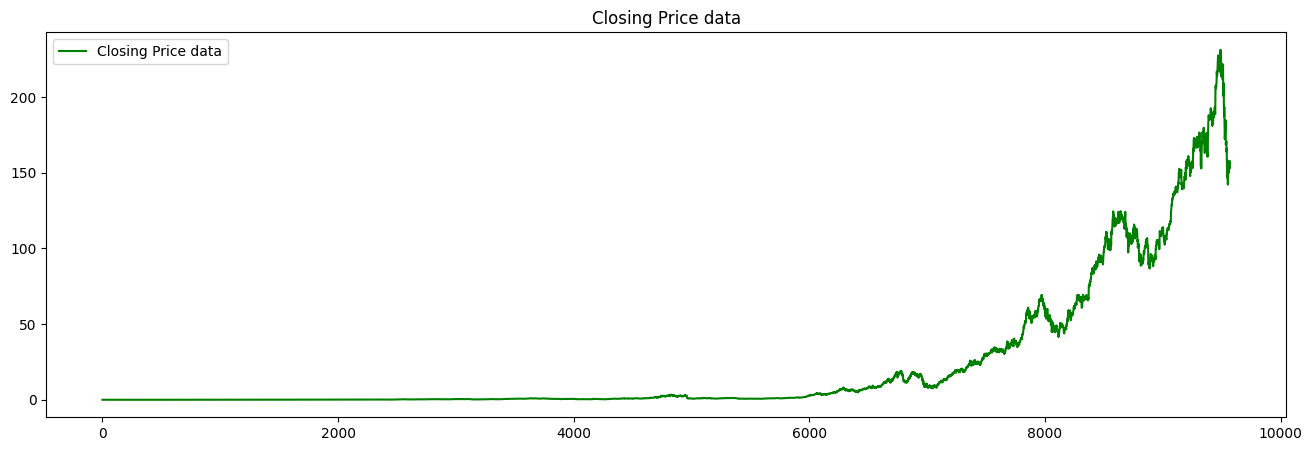

In [8]:
plt.figure(figsize = (16,5))
plt.title("Closing Price data")
plt.plot(data["close"],label = "Closing Price data",color = "green")
plt.legend()
plt.show()

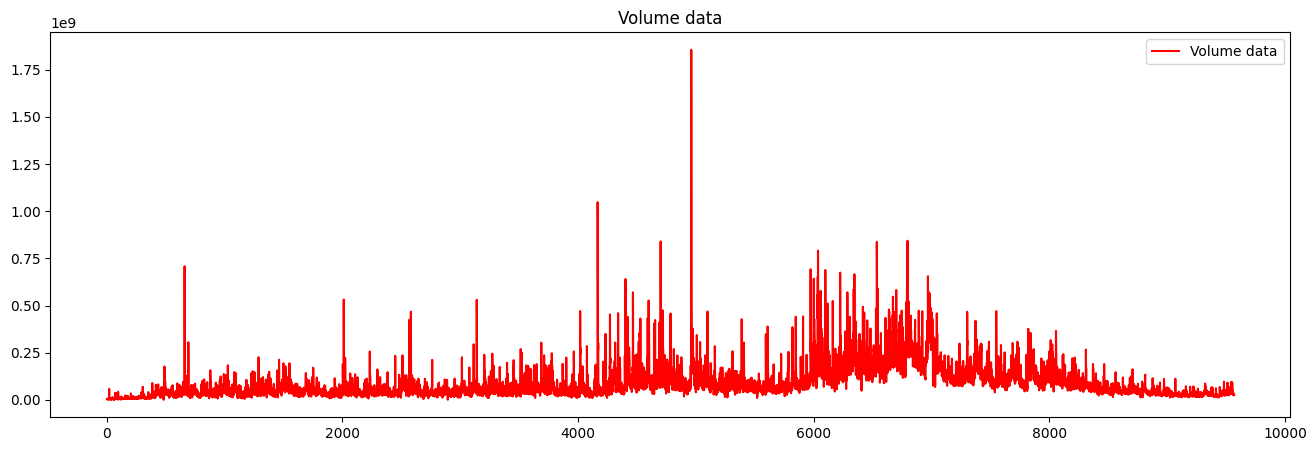

In [9]:
plt.figure(figsize = (16,5))
plt.title("Volume data")
plt.plot(data["volume"],label = "Volume data",color = "red")
plt.legend()
plt.show()

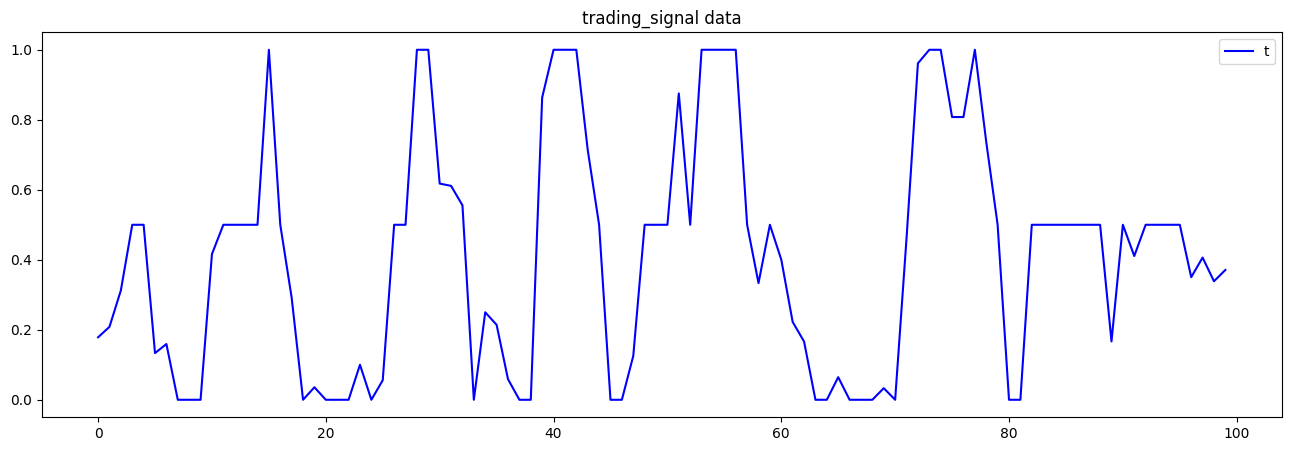

In [10]:
plt.figure(figsize = (16,5))
plt.title("trading_signal data")
plt.plot(data["trading_signal"][0:100],color = "blue")
plt.legend("trading_signal data")
plt.show()

### Checking correlation between the features

<Axes: >

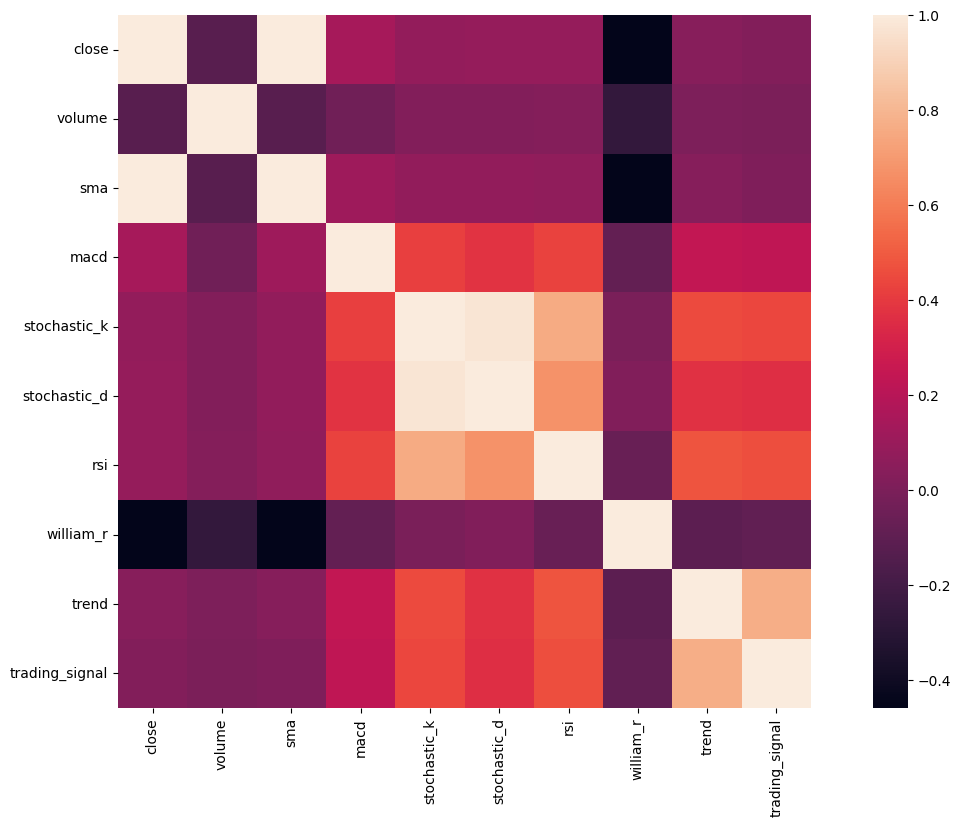

In [11]:
correlation = data.corr()
plt.figure(figsize = (16,9))
sns.heatmap(correlation, square = True)

### Normalizing features(scaling) of the Data

In [12]:
X = data.drop(columns = ["trading_signal"])
X = (X-X.min())/(X.max()-X.min())
X

,close,volume,sma,macd,stochastic_k,stochastic_d,rsi,william_r,trend
0,0.000053,0.001775,0.000060,0.638033,0.220088,0.269728,0.261916,0.217441,0.0
1,0.000050,0.001316,0.000058,0.638027,0.192063,0.246061,0.235214,0.225196,0.0
2,0.000053,0.001467,0.000057,0.638029,0.168544,0.219399,0.285763,0.209391,0.0
3,0.000056,0.002406,0.000055,0.638037,0.156068,0.193087,0.368855,0.238027,0.0
4,0.000051,0.002820,0.000054,0.638039,0.145806,0.171722,0.290795,0.282090,0.0
...,...,...,...,...,...,...,...,...,...
9565,0.662869,0.016197,0.683027,0.613880,0.433271,0.361023,0.363479,0.038208,0.0
9566,0.665550,0.012282,0.681886,0.636230,0.467709,0.396966,0.375290,0.035935,1.0
9567,0.660274,0.013527,0.680328,0.646456,0.500859,0.432796,0.356415,0.037287,0.0
9568,0.682155,0.017891,0.684976,0.677991,0.536645,0.467119,0.451824,0.024505,1.0


### Spliting Data into training and testing sets

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X, data["trading_signal"], test_size=0.2)

### Training our model

In [15]:
lrr = LinearRegression()
lrr.fit(x_train,y_train)

LinearRegression()

### Evaluating our model

In [16]:
predictions = lrr.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(y_test, predictions))

Mean Squared Error:  0.04048146409649627


### Training SVM model

In [17]:
svm = SVR()
svm.fit(x_train,y_train)

SVR()

### Evaluating SVM model

In [18]:
svm_pred = svm.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(y_test, predictions))

Mean Squared Error:  0.04048146409649627


## Artificial Neural Network creation

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(),metrics=["mae","mse"])

model.summary()

2023-09-04 12:46:23.540636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,073
Trainable params: 11,073
Non-trainable params: 0
_________________________________________________________________


## Training the ANN

In [20]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "save_model2.h5", monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch',
    options=None,)

# TRAINING THE MODEL
model.fit(x_train,y_train, epochs=50, batch_size=64,callbacks=checkpoint,validation_split=0.1)

Epoch 1/50
101/108 [===========================>..] - ETA: 0s - loss: 0.0486 - mae: 0.1935 - mse: 0.0486
Epoch 1: val_loss improved from inf to 0.03960, saving model to save_model2.h5
108/108 [==============================] - 2s 8ms/step - loss: 0.0481 - mae: 0.1930 - mse: 0.0481 - val_loss: 0.0396 - val_mae: 0.1826 - val_mse: 0.0396
Epoch 2/50
108/108 [==============================] - ETA: 0s - loss: 0.0400 - mae: 0.1810 - mse: 0.0400
Epoch 2: val_loss improved from 0.03960 to 0.03835, saving model to save_model2.h5
108/108 [==============================] - 1s 8ms/step - loss: 0.0400 - mae: 0.1810 - mse: 0.0400 - val_loss: 0.0384 - val_mae: 0.1718 - val_mse: 0.0384
Epoch 3/50
102/108 [===========================>..] - ETA: 0s - loss: 0.0397 - mae: 0.1801 - mse: 0.0397
Epoch 3: val_loss improved from 0.03835 to 0.03802, saving model to save_model2.h5
108/108 [==============================] - 1s 5ms/step - loss: 0.0397 - mae: 0.1802 - mse: 0.0397 - val_loss: 0.0380 - val_mae: 0.1717

In [21]:
from tensorflow.keras.models import load_model
# LOADING THE BEST SAVED MODEL
model = load_model("save_model2.h5")

In [22]:
ANN_pred = model.predict(x_test)
mean_squared_error(ANN_pred,y_test)

60/60 [==============================] - 0s 3ms/step


0.038901740145609764

### Visualizing the result

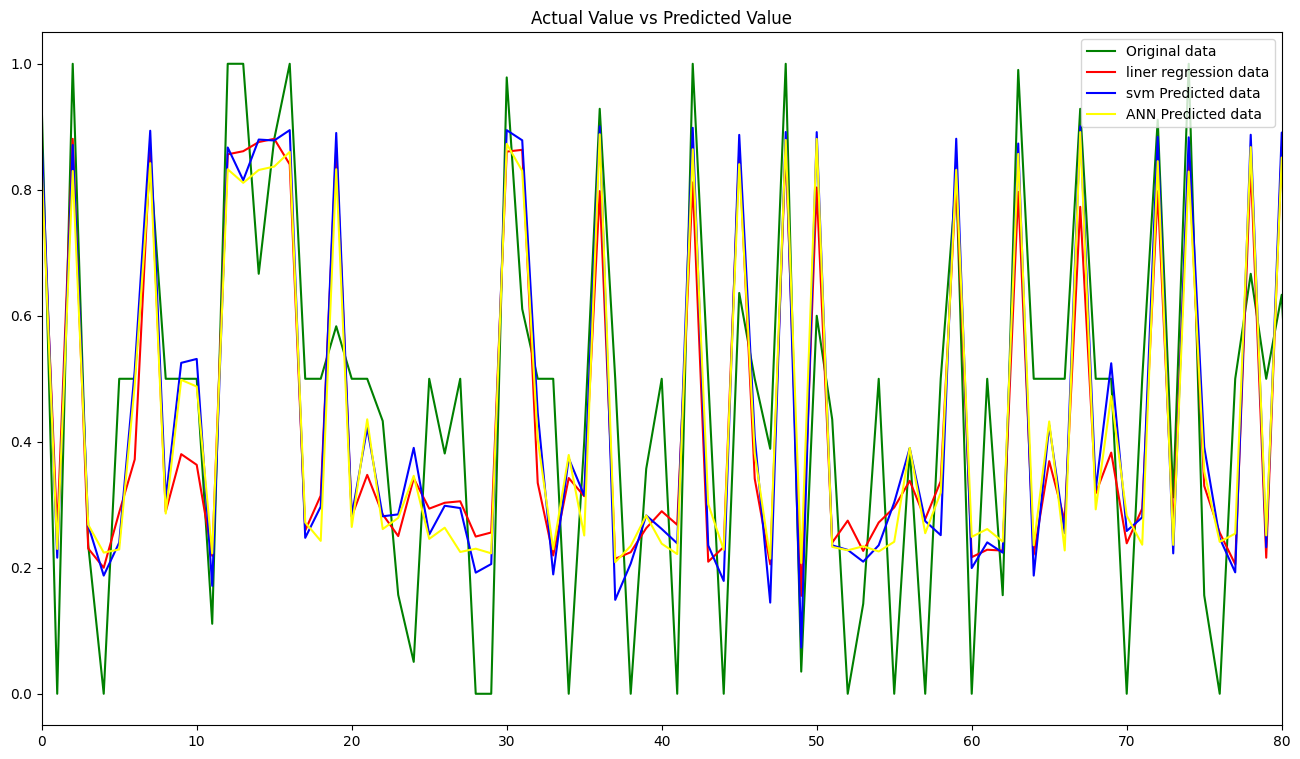

In [24]:
plt.figure(figsize = (16,9))
plt.xlim(0,80)
plt.title("Actual Value vs Predicted Value")
plt.plot(y_test.values,label = "Original data",color = "green")
plt.plot(predictions,label = "liner regression data",color = "red")
plt.plot(svm_pred,label = "svm Predicted data",color = "blue")
plt.plot(ANN_pred,label = "ANN Predicted data",color = "yellow")
plt.legend()